In [1]:
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances
using MAT

In [8]:
C = DataFrame(VegaDatasets.dataset("cars"))

Row,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
,String,Float64?,Int64,Float64,Int64?,Int64,Float64,String,String
1,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970-01-01,USA
2,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970-01-01,USA
3,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970-01-01,USA
4,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970-01-01,USA
5,ford torino,17.0,8,302.0,140,3449,10.5,1970-01-01,USA
6,ford galaxie 500,15.0,8,429.0,198,4341,10.0,1970-01-01,USA
7,chevrolet impala,14.0,8,454.0,220,4354,9.0,1970-01-01,USA
8,plymouth fury iii,14.0,8,440.0,215,4312,8.5,1970-01-01,USA
9,pontiac catalina,14.0,8,455.0,225,4425,10.0,1970-01-01,USA


In [4]:
dropmissing!(C)
#M = Matrix(C[:,2:7])
#names(C)


9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [30]:
using MAT
M = matread("parametersForAnalysisJulia.mat")
M = M["newMat"]
#q = reshape(M["newMat"][:,1],112,11)

112×11 Matrix{Float64}:
 0.697852  0.5781      0.922823  …  1.0323   1.06635   12.6061  1.16478
 0.632348  0.546651    1.32819      1.0634   1.18068   13.38    1.19307
 0.543271  0.68168     0.946423     1.10529  1.03483   10.9953  1.18442
 0.63015   0.489495    0.659253     1.06593  1.01285   14.7324  1.17889
 0.359591  0.649785    0.945957     1.18609  1.04897   11.2018  1.15077
 0.592957  0.651926    0.864919  …  1.07938  1.01768   11.007   1.13993
 0.765515  0.520816    0.653773     1.0104   0.991737  13.7815  1.15978
 0.763867  0.556291    0.722817     1.01089  1.0048    13.0193  1.16506
 0.759978  0.60887     1.5297       1.01085  1.19885   12.451   1.20678
 0.735902  0.5425      0.791218     1.0223   1.04677   13.6233  1.18293
 ⋮                               ⋱                              ⋮
 0.444043  0.517315    2.41174      1.1503   1.36392   13.8649  1.17061
 0.454803  0.632622    1.15655      1.12904  1.0977    11.1501  1.12886
 0.797521  0.640179    0.913091  …  0.99742  1

In [5]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 2
 1
 1
 1
 3
 1
 1
 1

In [31]:
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

112×11 Matrix{Float64}:
  0.841483   0.00744591  -0.232373  …  -0.330147   -0.108056   -0.26275
  0.250531  -0.305005    -0.206759      0.0206149   0.273185    0.271031
 -0.553098   1.03652     -0.230881     -0.426857   -0.901564    0.107912
  0.230701  -0.872856    -0.249027     -0.494278    0.93938     0.003515
 -2.21019    0.719635    -0.230911     -0.383453   -0.799812   -0.527005
 -0.104843   0.740908    -0.236031  …  -0.479442   -0.895804   -0.731583
  1.45191   -0.561675    -0.249373     -0.559045    0.470956   -0.357019
  1.43705   -0.209236    -0.24501      -0.518977    0.0954734  -0.257437
  1.40196    0.313148    -0.194026      0.0763389  -0.184449    0.529705
  1.18475   -0.346246    -0.240688     -0.390201    0.393036    0.0797844
  ⋮                                 ⋱                           ⋮
 -1.4483    -0.596463    -0.138294      0.582745    0.512046   -0.152669
 -1.35122    0.549118    -0.217604     -0.233955   -0.82532    -0.940595
  1.74065    0.624199    -0.232987

In [32]:
data'

11×112 adjoint(::Matrix{Float64}) with eltype Float64:
  0.841483     0.250531   -0.553098   …  -1.54755     0.22093     0.849092
  0.00744591  -0.305005    1.03652       -2.03959    -1.31712    -0.211446
 -0.232373    -0.206759   -0.230881       6.65471    -0.255412   -0.244526
 -0.0980426   -0.0980426  -0.0980426     -0.0980426  -0.0980426  -0.0980426
 -0.0944912   -0.0944912  -0.0944912     -0.0944912  -0.0944912  -0.0944912
 -0.488981    -0.4484      0.489716   …   4.28915    -0.544041    0.221145
 -0.547982    -0.497343    0.477116       4.31055    -0.547982    0.208904
 -0.970361    -0.338587    0.512548       1.68015    -0.260313   -0.814082
 -0.330147     0.0206149  -0.426857       4.34101    -0.570985   -0.504661
 -0.108056     0.273185   -0.901564       1.12224     1.64549     0.11552
 -0.26275      0.271031    0.107912   …   3.18258     0.0532129  -0.176187

In [33]:
p = fit(PCA,data',maxoutdim=2)

PCA(indim = 11, outdim = 2, principalratio = 0.5481097765808146)

Pattern matrix (unstandardized loadings):
──────────────────────────
           PC1         PC2
──────────────────────────
1   -0.462022   -0.582702
2   -0.618763    0.640958
3    0.747217    0.0554601
4   -0.0937105   0.0159761
5   -0.0679208   0.308077
6    0.729091    0.269512
7    0.736099    0.274035
8    0.493233    0.569406
9    0.805703    0.0255883
10   0.577172   -0.661429
11   0.862826   -0.24288
──────────────────────────

Importance of components:
─────────────────────────────────────────────
                                PC1       PC2
─────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.21151   1.8177
Variance explained         0.382864  0.165245
Cumulative variance        0.382864  0.54811
Proportion explained       0.698518  0.301482
Cumulative proportion      0.698518  1.0
─────────────────────────────────────────────

In [34]:
P = projection(p)

11×2 Matrix{Float64}:
  0.225136   -0.4322
  0.301513    0.47541
 -0.364106    0.0411357
  0.0456636   0.0118498
  0.0330966   0.228507
 -0.355274    0.199902
 -0.358689    0.203257
 -0.240344    0.422339
 -0.392605    0.0189793
 -0.281246   -0.490594
 -0.42044    -0.180148

In [35]:
P'*(data[1,:]-mean(p))

2-element Vector{Float64}:
  1.142672893660483
 -0.9173330495618738

In [36]:
Yte = MultivariateStats.transform(p, data') #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×112 Matrix{Float64}:
  1.14267    0.252314  0.171933  …  -10.2258   -0.0705823   0.490716
 -0.917333  -0.800721  1.52567        1.35185  -1.91269    -0.791976

In [37]:
Xr = reconstruct(p, Yte)

11×112 Matrix{Float64}:
  0.653728    0.402877    …  -2.88646     0.810773     0.45277
 -0.0915789  -0.304595       -2.44052    -0.930591    -0.228556
 -0.453789   -0.124807        3.77888    -0.0529803   -0.211251
  0.0413083   0.00203318     -0.450926   -0.0258879    0.0130231
 -0.171798   -0.174619       -0.0295327  -0.439397    -0.164731
 -0.589338   -0.249706    …   3.90319    -0.357273    -0.332656
 -0.596318   -0.253254        3.94264    -0.36345     -0.336989
 -0.66206    -0.398818        3.02864    -0.790838    -0.452423
 -0.46603    -0.114257        4.04035    -0.00859053  -0.207689
  0.128666    0.321867        2.21275     0.958203     0.250526
 -0.31517     0.0381656   …   4.0558      0.374242    -0.0636441

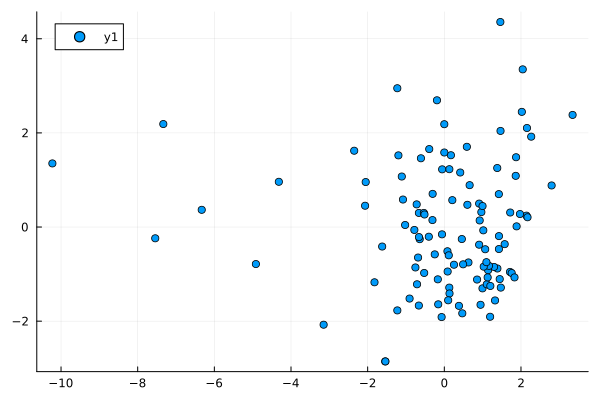

In [38]:
Plots.scatter(Yte[1,:],Yte[2,:])

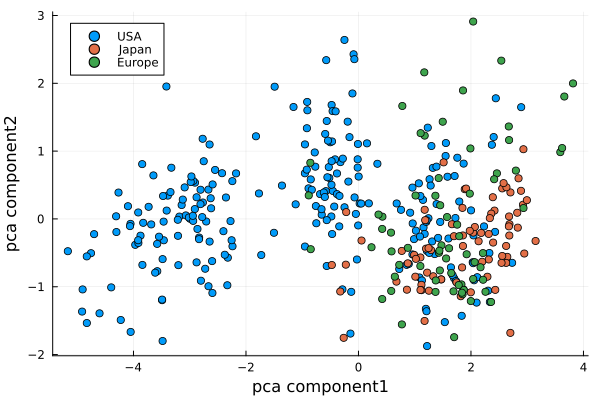

In [14]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")

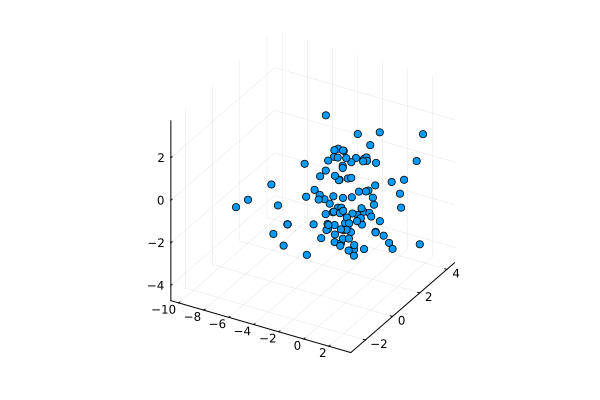

In [39]:
p = fit(PCA,data',maxoutdim=3)
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],legend=false)

In [40]:
using GLMakie
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:])

In [41]:
display(scene)

GLMakie.Screen(...)

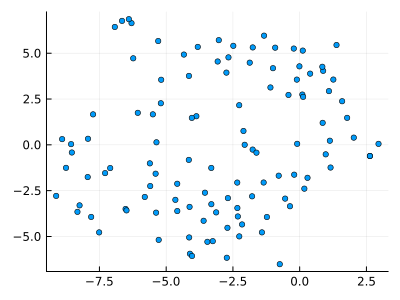

In [42]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],legend=false,size=(400,300),markersize=3)

In [43]:
L = cor(data,data,dims=2)
embedding = umap(L, 2)

2×112 Matrix{Float64}:
  2.16822  -0.442123  -0.956206  -1.23045   …  -2.56599  -1.51803  2.10323
 -0.15281   0.94735   -2.9971     0.996836     -1.09018   1.01045  0.642501

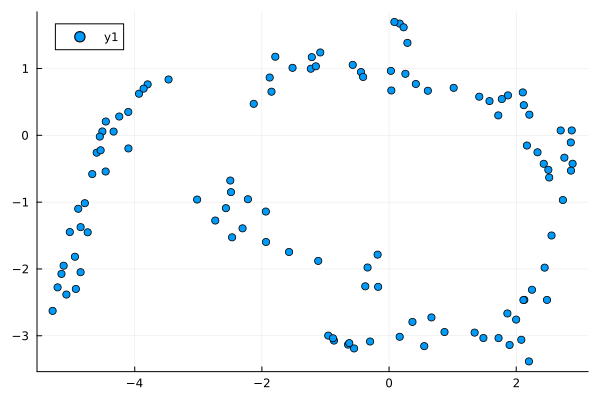

In [44]:
Plots.scatter(embedding[1,:],embedding[2,:])

In [45]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(-L, 2)

2×112 Matrix{Float64}:
 5.28159  4.12663  1.10383  3.76385  -0.387319  …  -1.88325  1.2832  4.89681
 4.65098  5.21021  3.0108   5.49429   2.92848       1.6656   5.3452  5.19474

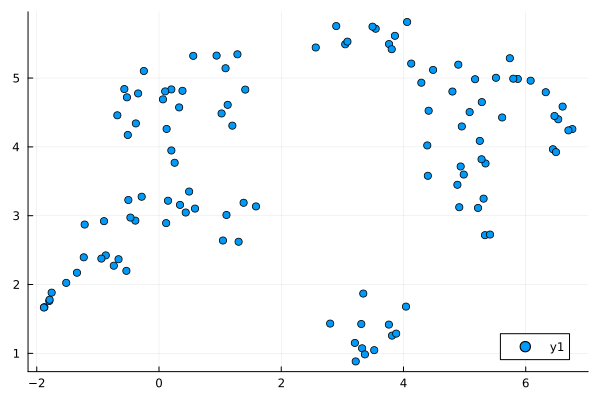

In [46]:
Plots.scatter(embedding[1,:],embedding[2,:])